In [2]:
import pandas as pd

city_table = pd.read_csv(r'C:\Users\ONE BY ONE\Desktop\My_Enviroment\CSV_Files\cleaned_temperature\cleaned city.csv')
country_table = pd.read_csv(r'C:\Users\ONE BY ONE\Desktop\My_Enviroment\CSV_Files\cleaned_temperature\cleaned country.csv')
major_table = pd.read_csv(r'C:\Users\ONE BY ONE\Desktop\My_Enviroment\CSV_Files\cleaned_temperature\cleaned major city.csv')
state_table = pd.read_csv(r'C:\Users\ONE BY ONE\Desktop\My_Enviroment\CSV_Files\cleaned_temperature\cleaned state.csv')
global_table = pd.read_csv(r'C:\Users\ONE BY ONE\Desktop\My_Enviroment\CSV_Files\cleaned_temperature\cleaned global.csv')


In [32]:
state_table

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
0,1855-05-01,25.544,1.171,Acre,Brazil,1855
1,1855-06-01,24.228,1.103,Acre,Brazil,1855
2,1855-07-01,24.371,1.044,Acre,Brazil,1855
3,1855-08-01,25.427,1.073,Acre,Brazil,1855
4,1855-09-01,25.675,1.014,Acre,Brazil,1855
...,...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China,2013
645671,2013-06-01,24.679,0.596,Zhejiang,China,2013
645672,2013-07-01,29.272,1.340,Zhejiang,China,2013
645673,2013-08-01,29.202,0.869,Zhejiang,China,2013


In [ ]:
# is there a relation between temperature and its uncertainty degree in city ?

correlation = city_table['AverageTemperature'].corr(city_table['AverageTemperatureUncertainty'])
print(correlation)

# yeah there is a medium to high correlation .

-0.23055791778974136


In [ ]:
# what is the form of the temperature distripution in major city ? is it normal or skewed ?

skewd = major_table['AverageTemperature'].skew()
print(skewd)

# there is a big nuumber of negative values , the values skewd to negative in high degree.

-0.9864092118911896


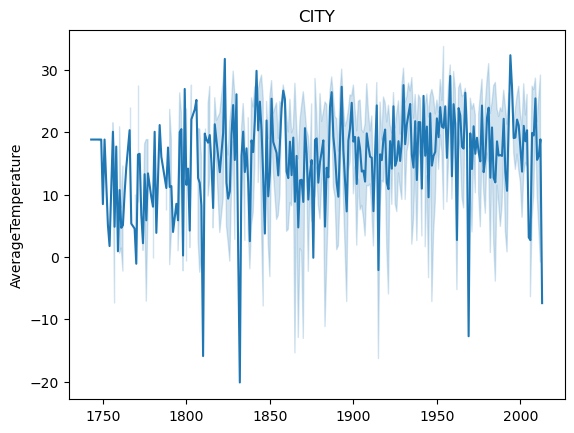

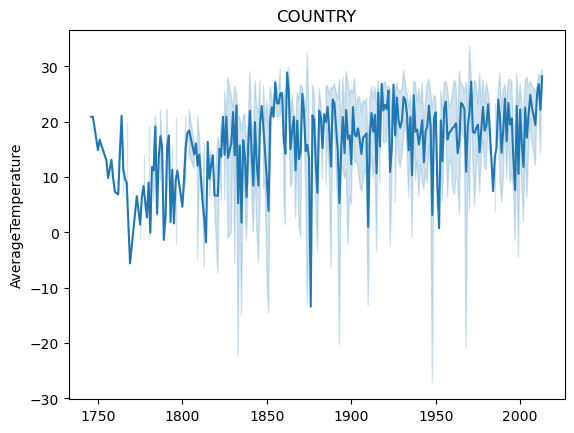

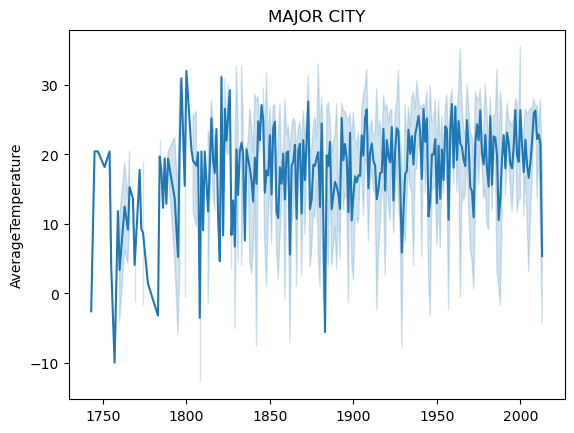

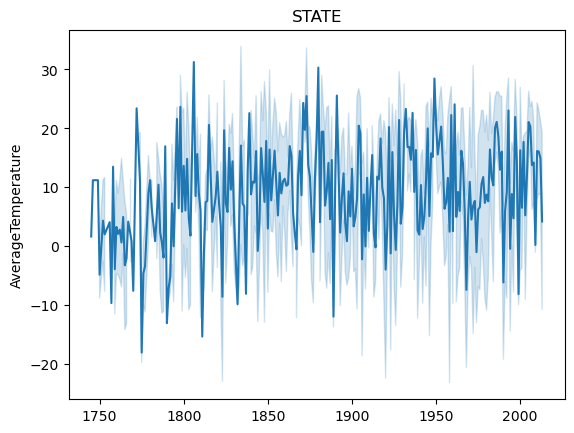

In [ ]:
# is there a differenct between the temperatures in each table you have ?
import matplotlib.pyplot as plt
import seaborn as sns

temp_city = city_table.sample(1000)
temp_country = country_table.sample(1000)
temp_major = major_table.sample(1000)
temp_state = state_table.sample(1000)

tables = [temp_city , temp_country , temp_major , temp_state]
names = ['CITY' , 'COUNTRY' , 'MAJOR CITY' , 'STATE']

for table in tables :
    table['Year'] = pd.to_datetime(table['dt']).dt.year

for i ,table in enumerate(tables):
    sns.lineplot(data = table , x = 'Year' , y = 'AverageTemperature')
    plt.xlabel('')
    plt.title(names[i])
    plt.show()


# here we can see the difference between them.

In [ ]:
# what is the distract range of temperatures in state ?
import numpy as np

std_dev = state_table['AverageTemperature'].std()
average = state_table['AverageTemperature'].mean()
CV = (std_dev / average)*100

print(CV)  

# ok , that big distract , and indicates that the values of temperature is fickle in big way !

148.69632545753927


In [36]:
# in global table is there a statistical difference between minimum and maximum temperatures ?
from scipy.stats import ttest_ind

t_stat , p_value = ttest_ind(global_table['LandMinTemperature'] , global_table['LandMaxTemperature'])

if(p_value < 0.05):
    print('Yes , there is a statistical difference')
else:
    print('No , there is no difference')

Yes , there is a statistical difference


In [37]:
# from the global is the ocean uncertainty degree has difference of land Uncertainty ?
from scipy.stats import ttest_ind 

t_stat , p_value = ttest_ind(global_table['LandAverageTemperatureUncertainty'] , global_table['LandAndOceanAverageTemperatureUncertainty'])

if(p_value < 0.05):
    print('Yes , there is a difference')
else:
    print('No , there is no difference')

Yes , there is a difference
